<a href="https://colab.research.google.com/github/minhduc01168/ET_Tri_tue_nhan_tao/blob/master/BTL_AI_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập lớn: Phân tích rủi ro tín dụng qua phương pháp học máy




## Scoping
Bài tập lớn: thuộc bài toán phân loại

Input: Dữ liệu về khách hàng từ các ngân hàng 

Output: Trả về trạng thái cho vay đối với khách hàng đó



## Data

### The dataset
Bộ dữ liệu sẽ được sử dụng được tìm thấy trên [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset?resource=download) và nó chứa dữ liệu cho 32.581 người vay và 11 biến (tuổi, thu nhập hàng năm, quyền sở hữu nhà, thời gian làm việc, ý định vay, mức vay, số tiền vay, Lãi suất, tình trạng vay, phần trăm thu nhập, vỡ nợ lịch sử, lịch sử tín dụng) liên quan đến mỗi người vay.

Mô tả:
* person_age: Age in years

* person_income: Annual Income in dollars

* personhomeownership: Home ownership

* personemplength: Employment length (in years)

* loan_intent: Loan intent

* loan_grade: Loan grade

* loan_amnt: Loan amount in dollars

* loanintrate: Interest rate

* loan_status: Loan status (0 is non default 1 is default)

* loanpercentincome: Percent income

* cbpersondefaultonfile: Historical default

* cbpresoncredhistlength: Credit history length



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import impute
import numpy as np

Kết nối Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/AI_ML_DS/AI/BTL_AI/credit_risk_dataset.csv')

Mô tả chi tiết về các đặc trưng được đưa ra trong bộ dữ liệu.

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


(32581, 12)

### Data Preprocessing

* Kiểm tra các dữ liệu bị thiếu trong bộ dữ liệu
* Thay thế các giá trị bị thiếu trong bộ dữ liệu bằng giá trị trung bình của mỗi biến.

pandas.DataFrame.fillna: Fill NA/NaN values using the specified method.




In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve, accuracy_score
from imblearn import under_sampling, over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
#Data cleaning
#Handling NA values
# Checking NA values in our dataset
missing = df.isnull().sum()
print(missing)


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


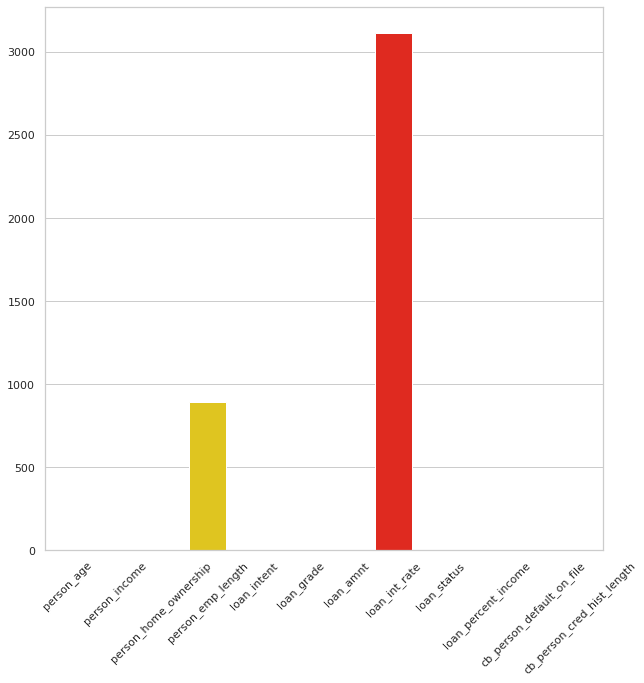

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
ax = sns.barplot(x = missing.index.tolist(), y = missing, palette = 'hot_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

Tính tỷ lệ phần trăm các giá trị bị thiếu cho các tính năng

In [ ]:
df.isnull().mean().sort_values(ascending = False)

loan_int_rate                 0.095639
person_emp_length             0.027470
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

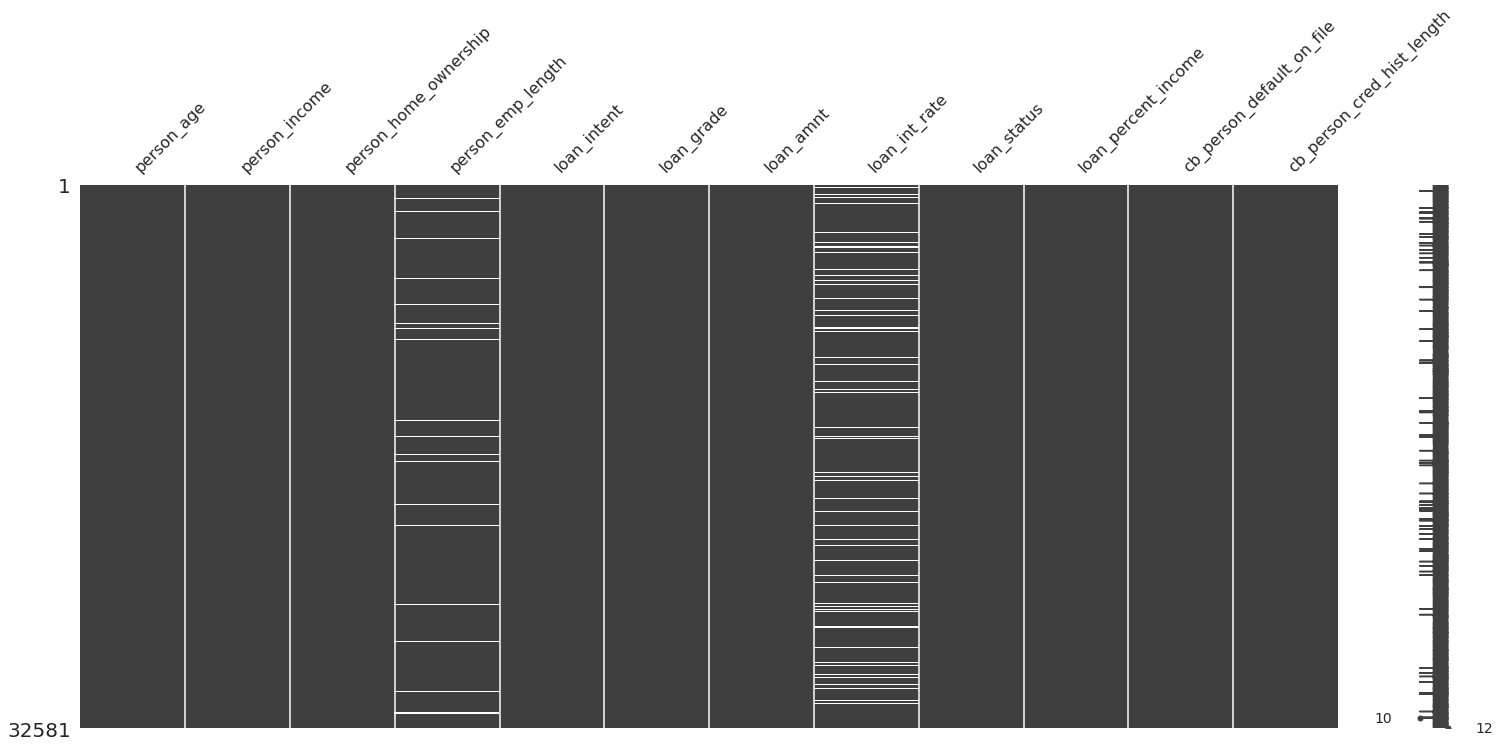

In [ ]:
# Or with plot checking
# Visualize missing values as a matrix
msno = msno.matrix(df)

# Fill missing values with the aerage average(mean) of the feature.

df['person_emp_length'].fillna(df['person_emp_length'].mean(),inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(),inplace=True)


In [ ]:
# Checking NA values in our dataset
# Now check again
missing = df.isnull().sum()
print(missing)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


Phân tích dữ liệu khám phá

#### Numerical Data

In [ ]:
features_numerical = df.select_dtypes(exclude = ['object'])
features_numerical.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

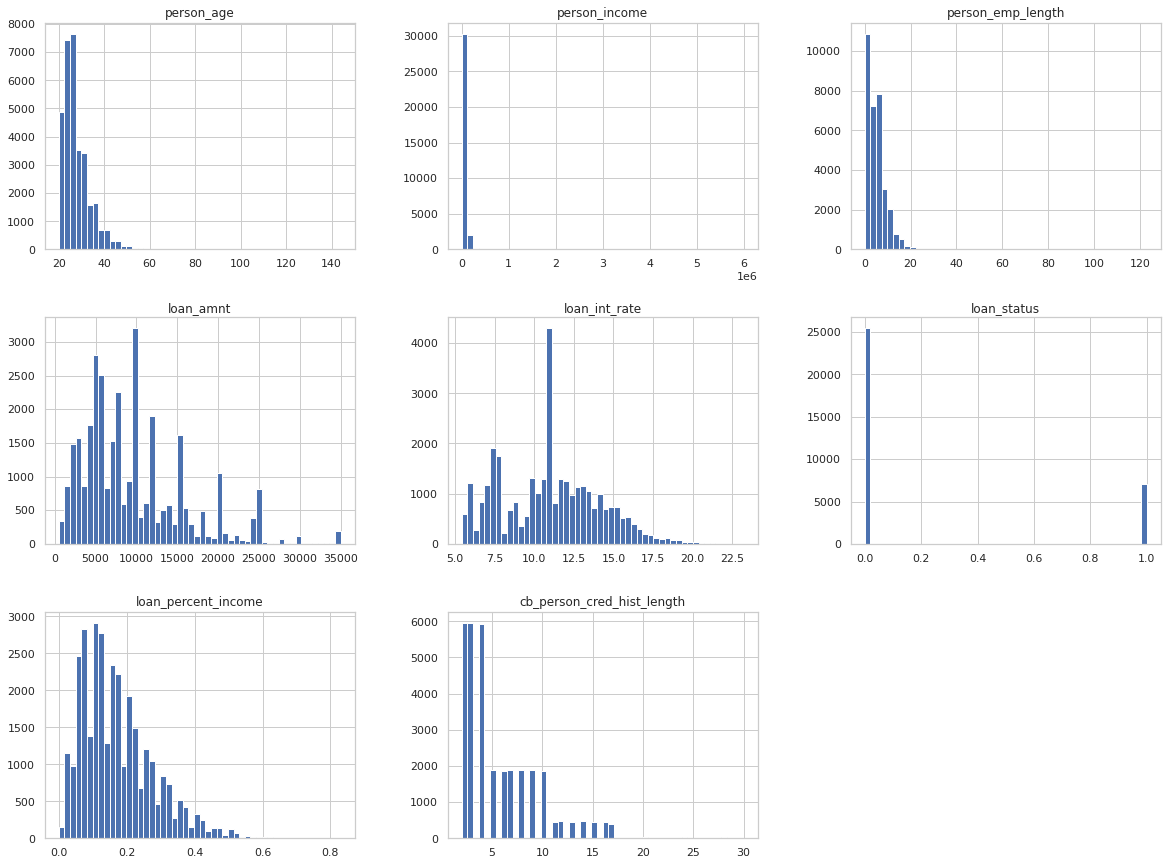

In [ ]:
# Dataset statistics
df.describe().T

# Histograms for numerical Data
df.hist(bins=50, figsize=(20,15))
plt.show()


#### Categorical Data

In [ ]:
features_categorical = df.select_dtypes(include = ['object']).copy()
features_categorical.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

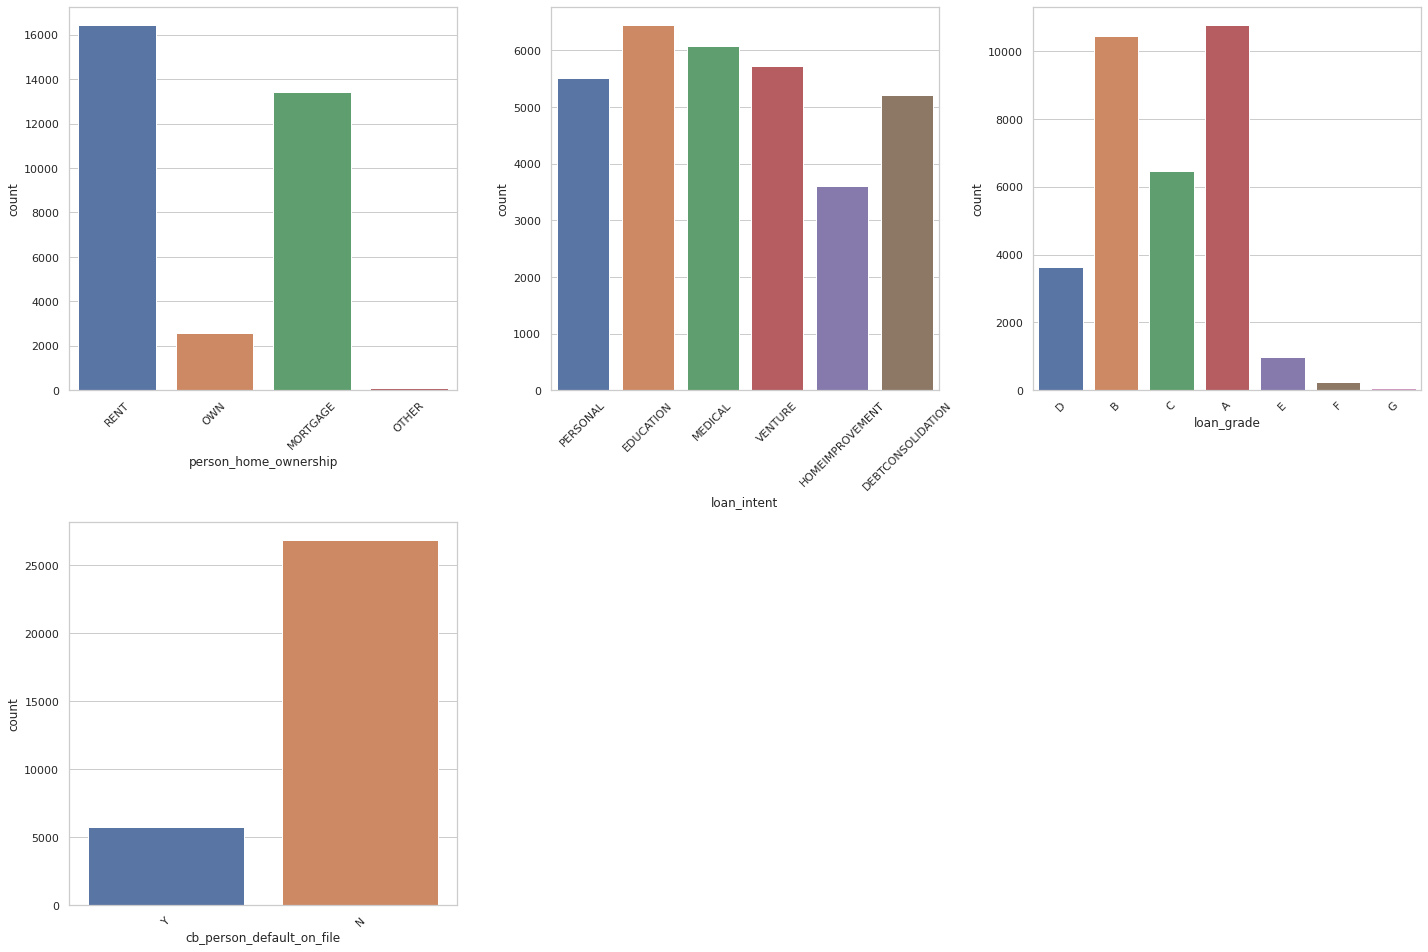

In [ ]:
fig = plt.figure(figsize = (20,20))
for i in range(len(features_categorical.columns)):
    fig.add_subplot(3, 3, i+1)
    ax = sns.countplot(x=features_categorical.iloc[:,i])
    #sns.histplot(features_categorical.iloc[:,i], hue="y", multiple="dodge")
    plt.xticks(rotation = 45)
plt.tight_layout()

* Từ biểu đồ person_home_ownership thấy được hai loại khách hàng chính yêu cầu vay là thuê nhà(rent) hoặc thế chấp(mortgage).
* Từ biểu đồ Loan_intent, cho thấy khách hàng yêu cầu vay chủ yếu cho các mục đích giáo dục(education) và y tế(medical).
* Từ biểu đồ Loan_Grade cho thấy khách hàng có lớp B và D lớn hơn 20.000 tổng số.


Mixed Plots

Text(0.5, 1.0, 'Loan ratio by Historical default')

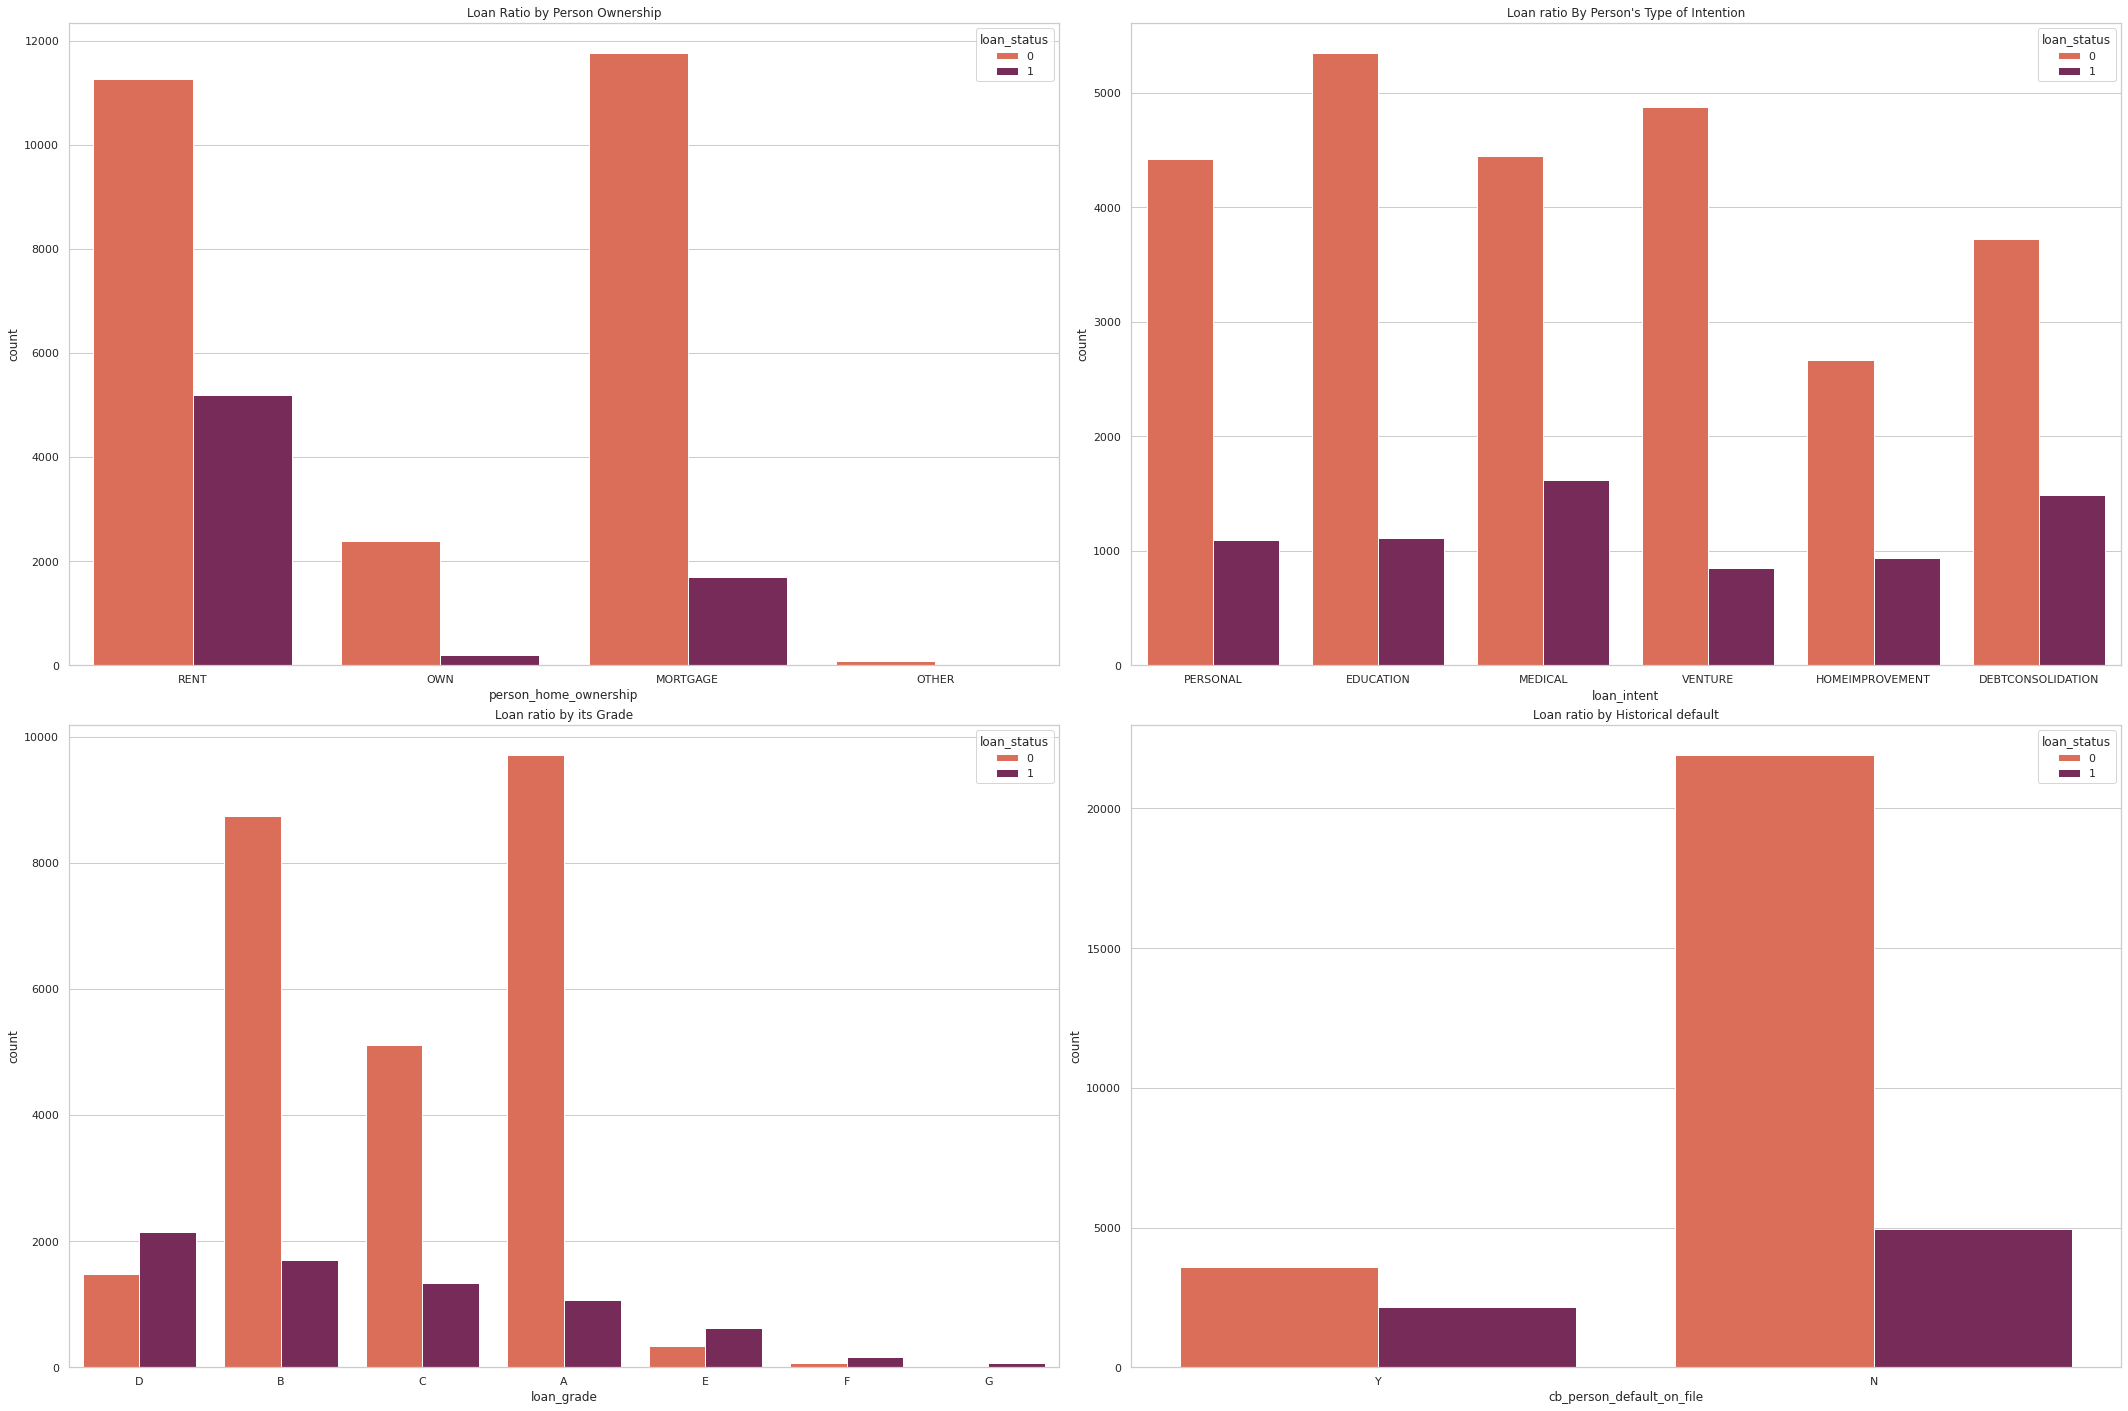

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (30,20))
plt.tight_layout(pad = 3)

sns.countplot(data = df, x ='person_home_ownership',hue = 'loan_status',ax =ax[0,0], palette = "rocket_r").set_title('Loan Ratio by Person Ownership')
sns.countplot(data = df, x ='loan_intent',hue = 'loan_status',ax =ax[0,1], palette = "rocket_r").set_title("Loan ratio By Person's Type of Intention")
sns.countplot(data = df, x ='loan_grade',hue = 'loan_status',ax =ax[1,0], palette = "rocket_r").set_title('Loan ratio by its Grade')
sns.countplot(data = df, x ='cb_person_default_on_file',hue = 'loan_status',ax =ax[1,1], palette = "rocket_r").set_title('Loan ratio by Historical default')

Correlation Plots
**Để xem liệu các biến trong tập dữ liệu có tương quan với nhau hay không?**
* Vẽ ma trận tương quan để chỉ ra mối tương quan giữa các biến.
Mỗi hình vuông cho thấy mối tương quan giữa các biến trên mỗi trục. Tương quan dao động từ -1 đến +1. Các giá trị gần hơn với 0 có nghĩa là không có xu hướng tuyến tính giữa 2 biến. Càng gần với 1 mối tương quan là càng tương quan(nếu 1 biến tăng, biến kia cũng sẽ tăng). Một mối tương quan gần với -1 (nếu một biến tăng, thì biến kia sẽ giảm).

Mối tương quan giữa hai biến cao hơn khi số trong hình vuông lớn hơn và màu tối hơn.




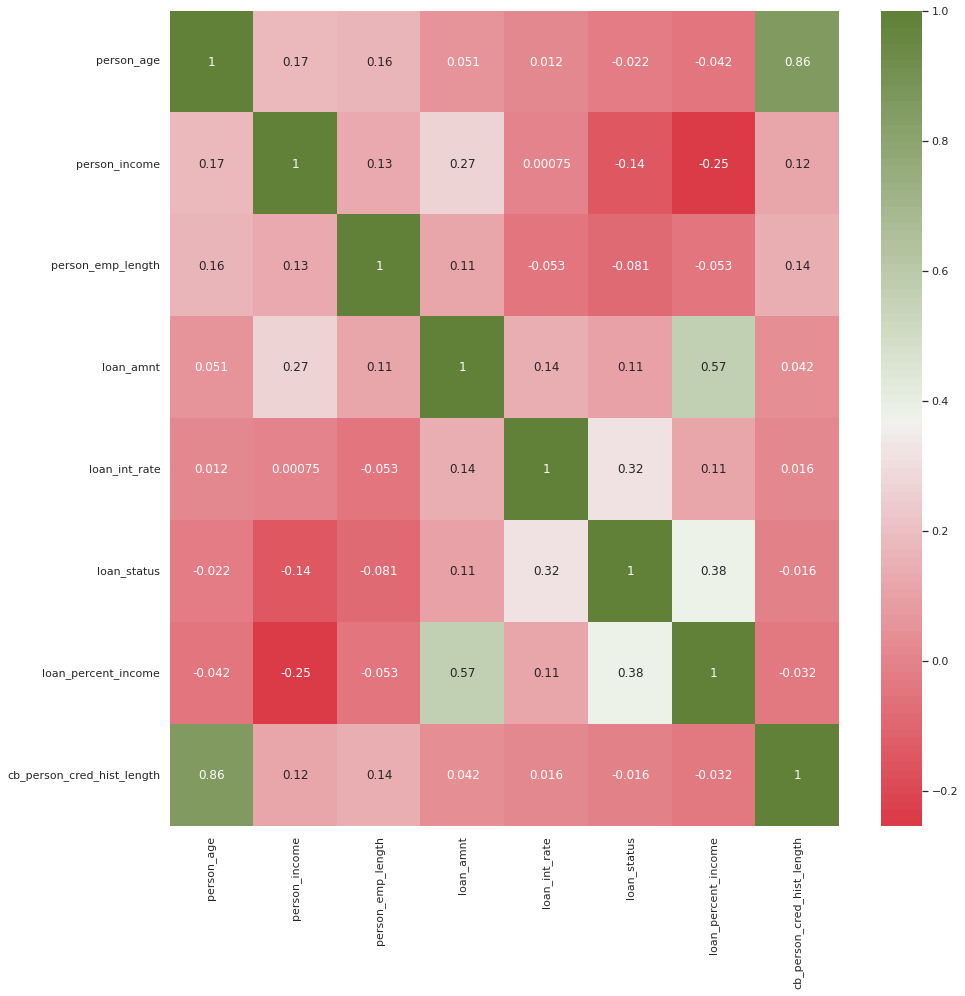

In [ ]:
# Heatmap - information map
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(df.corr(), annot=True ,cmap =sns.diverging_palette(10, 110, n=100))

Từ ma trận tương quan cho thấy không có bất kỳ mối tương quan đáng kể nào giữa các biến.

Có một mối tương quan thấp giữa số tiền cho vay(loan_amnt) và thu nhập cá nhân(person_income) 

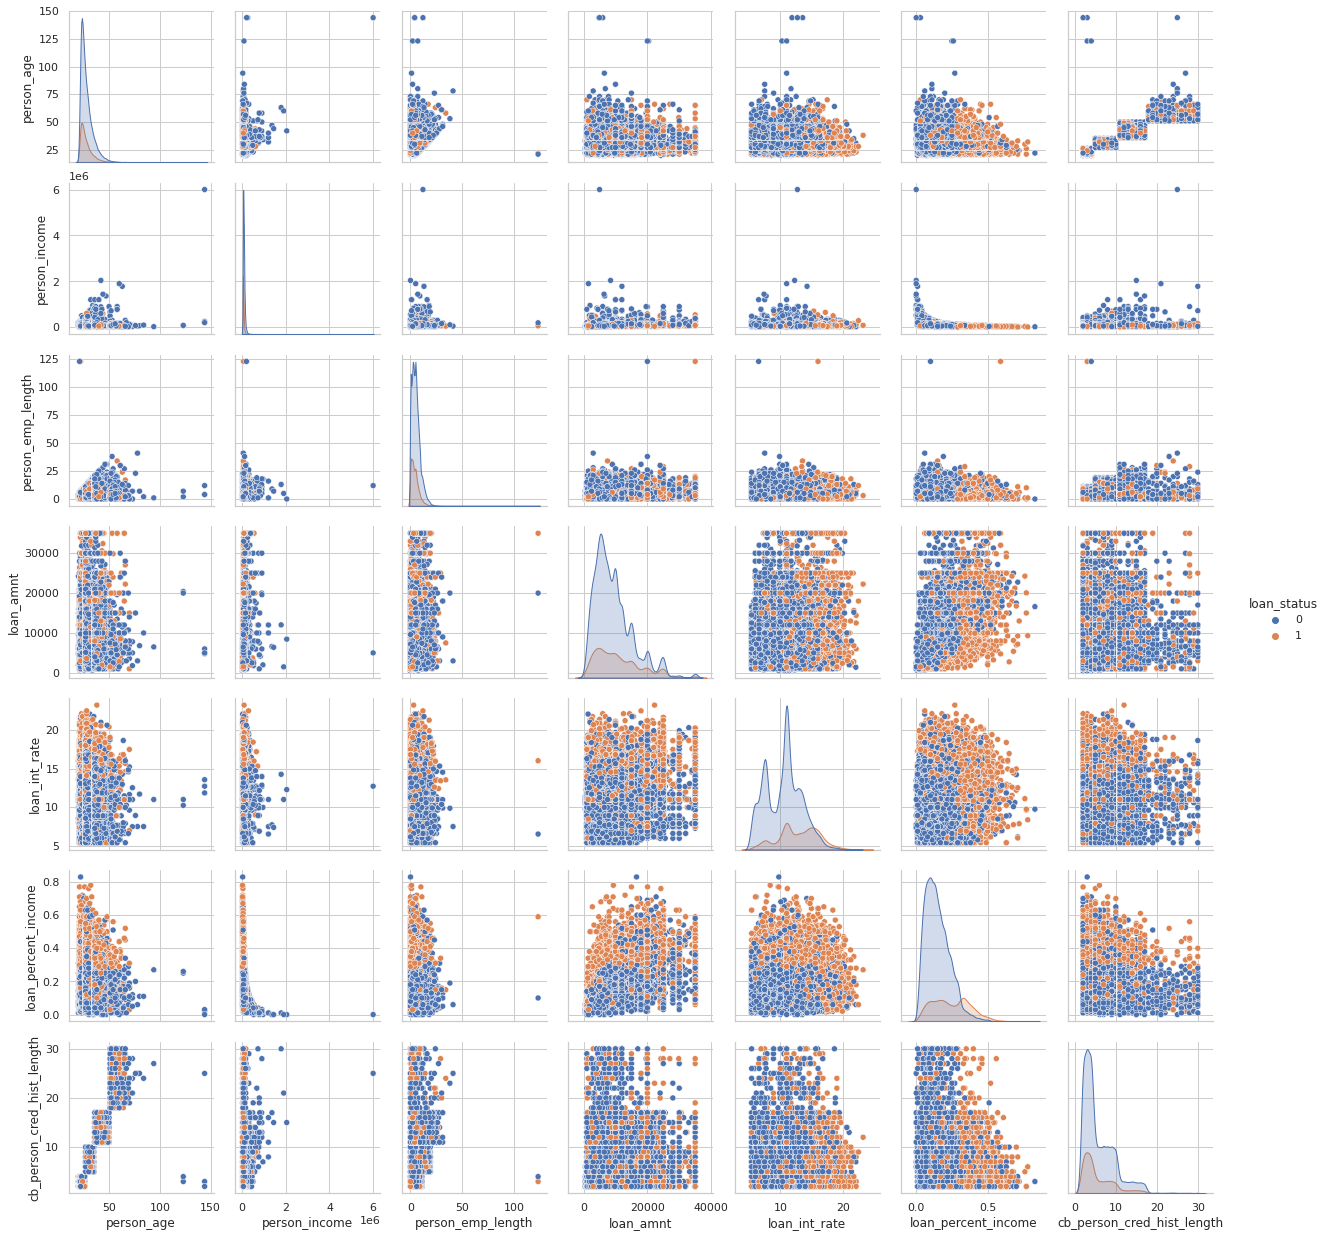

In [ ]:
# Pairplot
pairplot = sns.pairplot(df, hue = 'loan_status')


### Chuyển dữ liệu sang dạng số 

In [ ]:
# Encoding categorical data with LabelEncoder Technique
# Define label_encoder
label_encoder = LabelEncoder()
# Encode labels in columns 'Type' and 'Method.
df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])

In [ ]:
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  int64  
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.0 MB


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


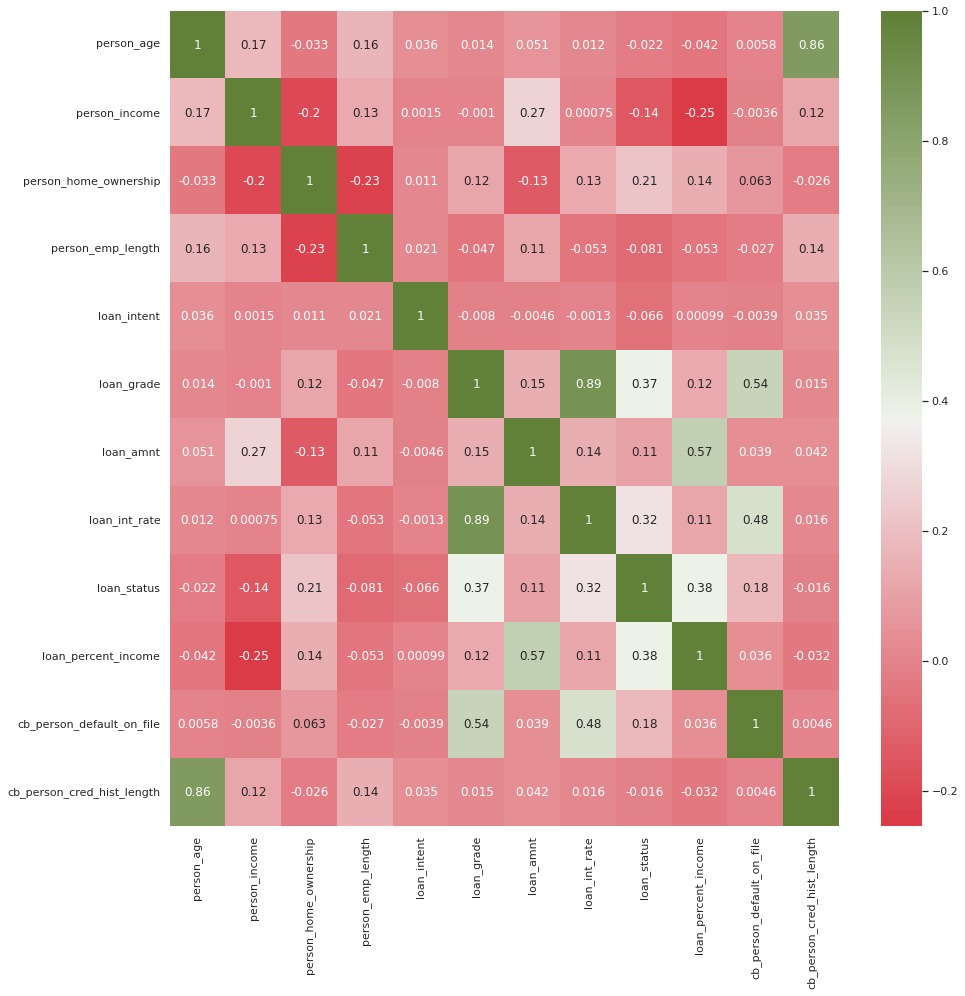

In [ ]:
# Heatmap - information map
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(df.corr(), annot=True ,cmap =sns.diverging_palette(10, 110, n=100))

Kết luận về mối tương quan giữa các biến : 
* Loan_amnt và Loan_Percent_income có mối tương quan cao tương đương với 0,57
* Loan_int_rate với Loan_Grade có mối tương quan cao tương đương với 0,89.
* Loan_Grade với cb_person_default_on_file có mối tương quan cao tương đương với 0,54. 
* person_income với loan_percent_income có giá trị bằng -0,25.


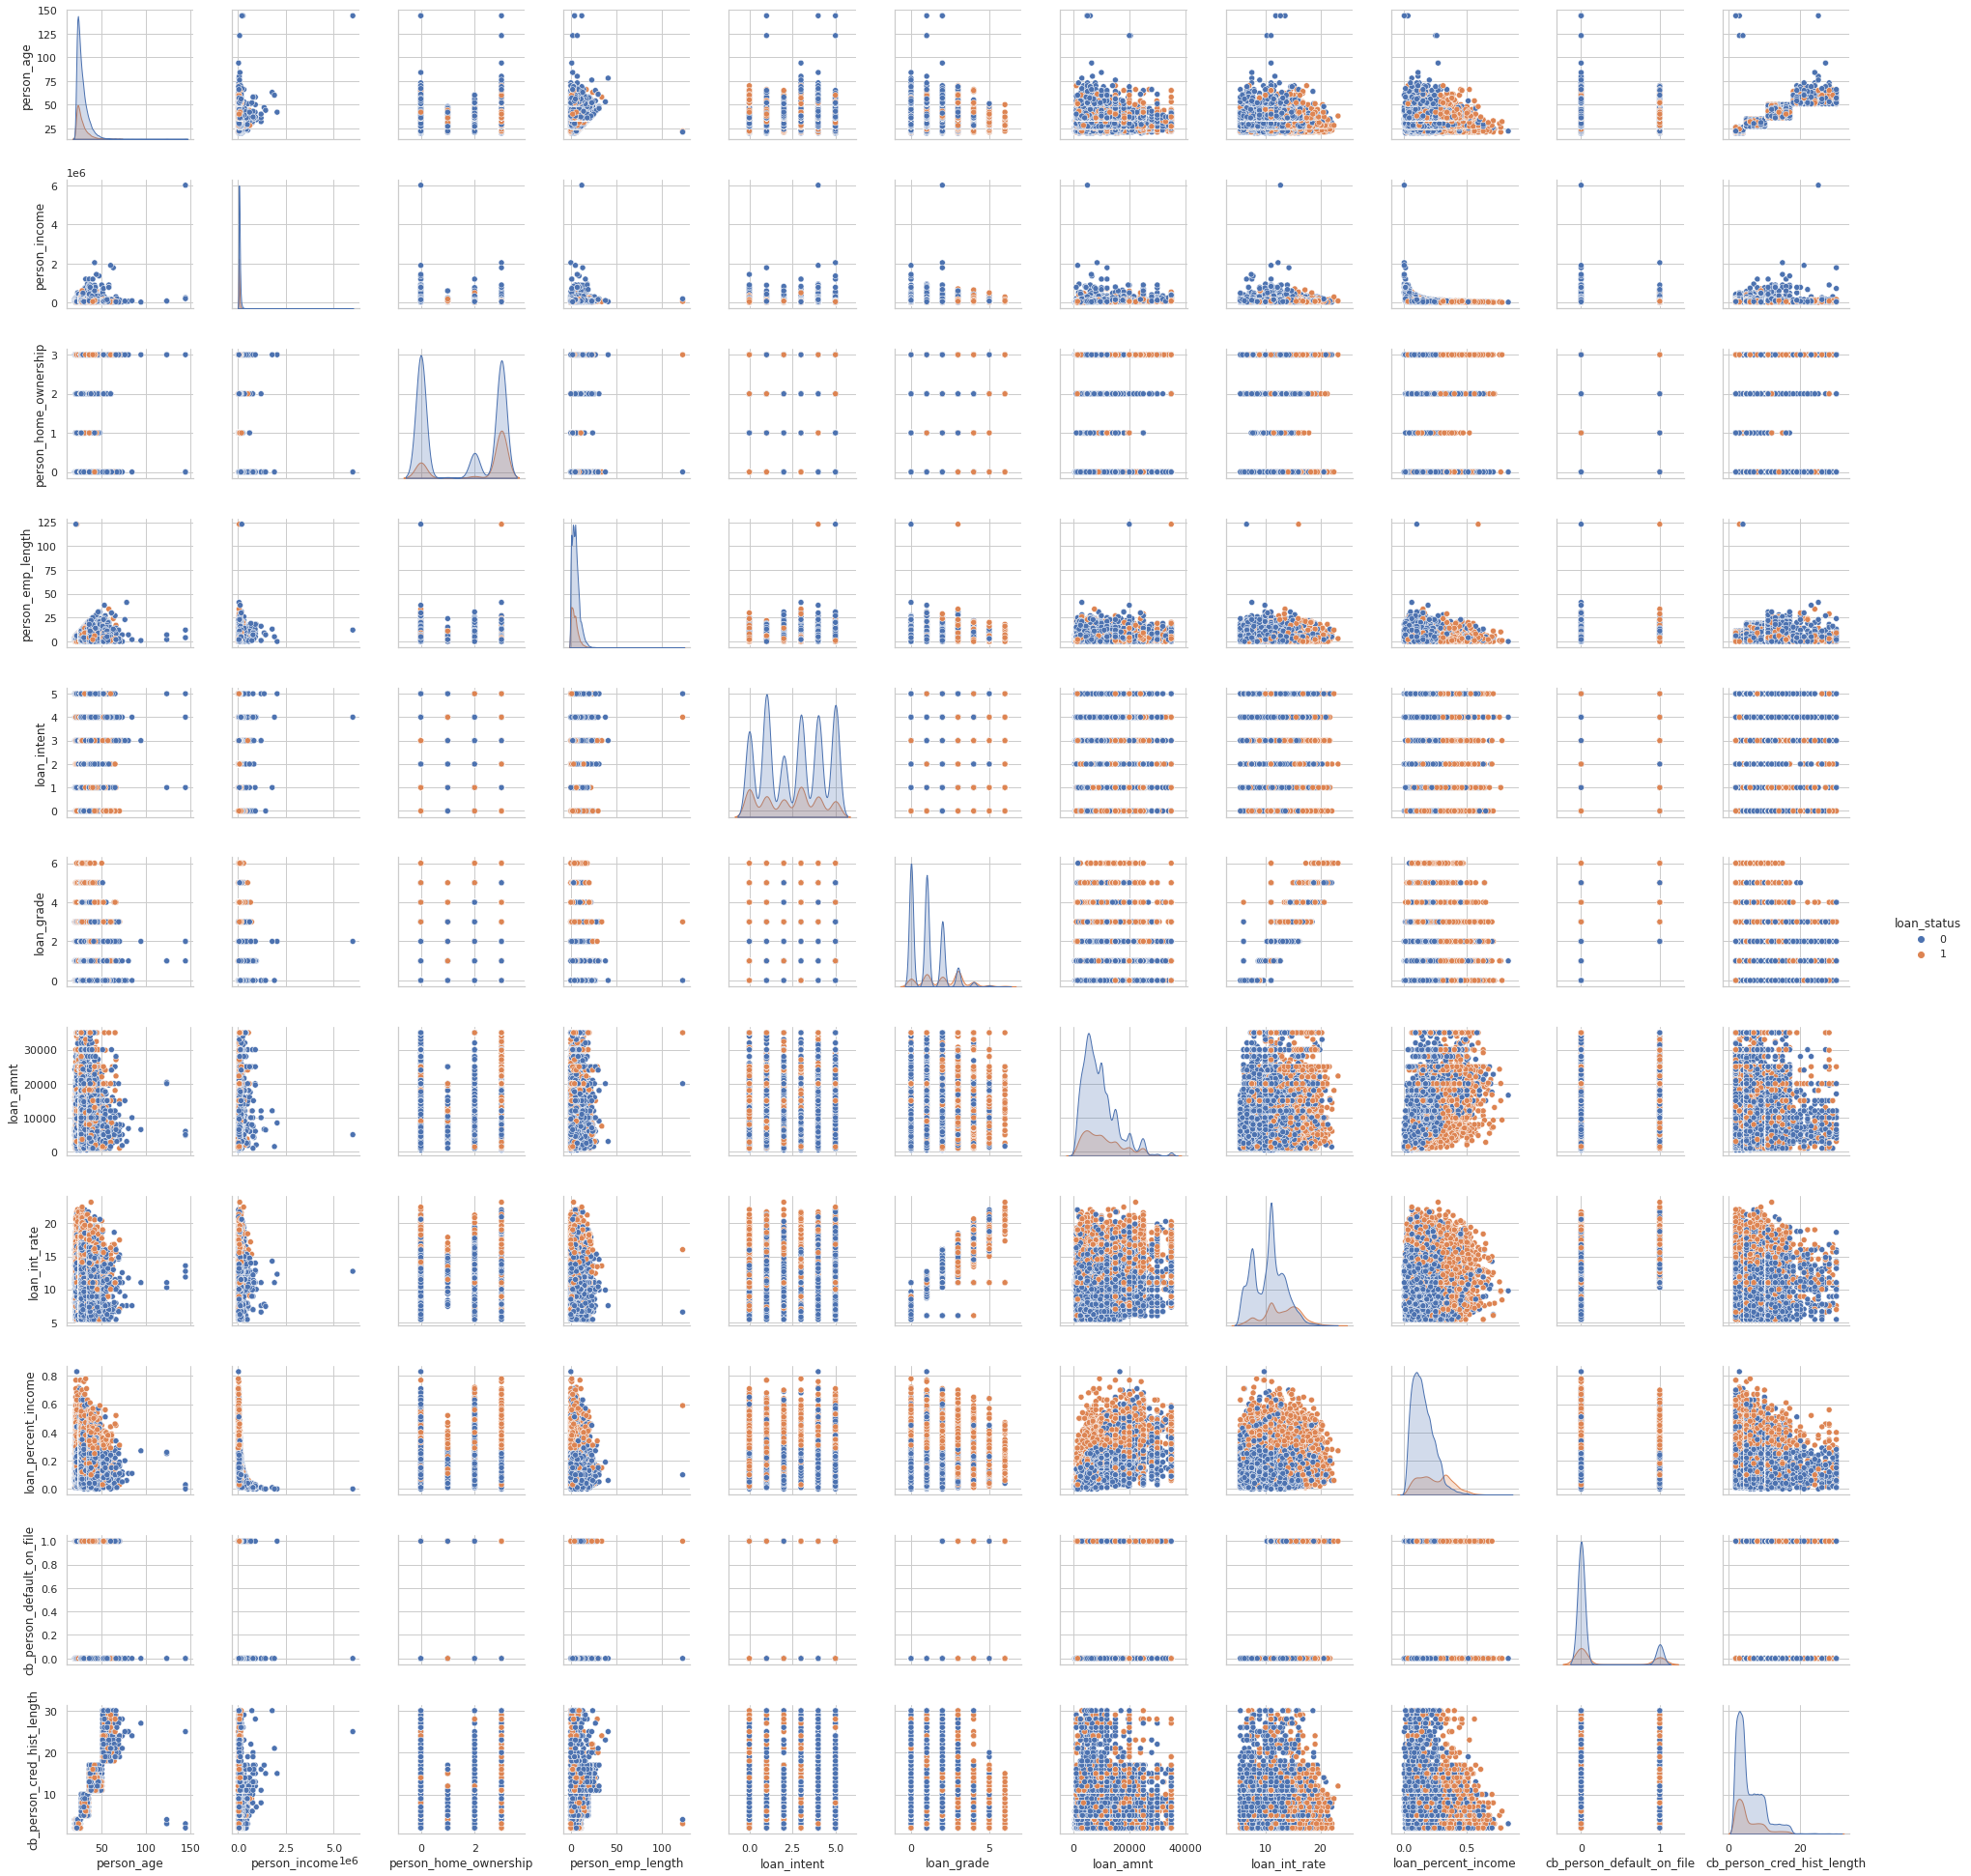

In [ ]:
# Pairplot
pairplot = sns.pairplot(df, hue = 'loan_status')

### Xóa các điểm outliersoutliers

In [ ]:
features_numerical = df.select_dtypes(exclude = ['object']).drop(['loan_status'], axis = 1).copy()
features_numerical.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

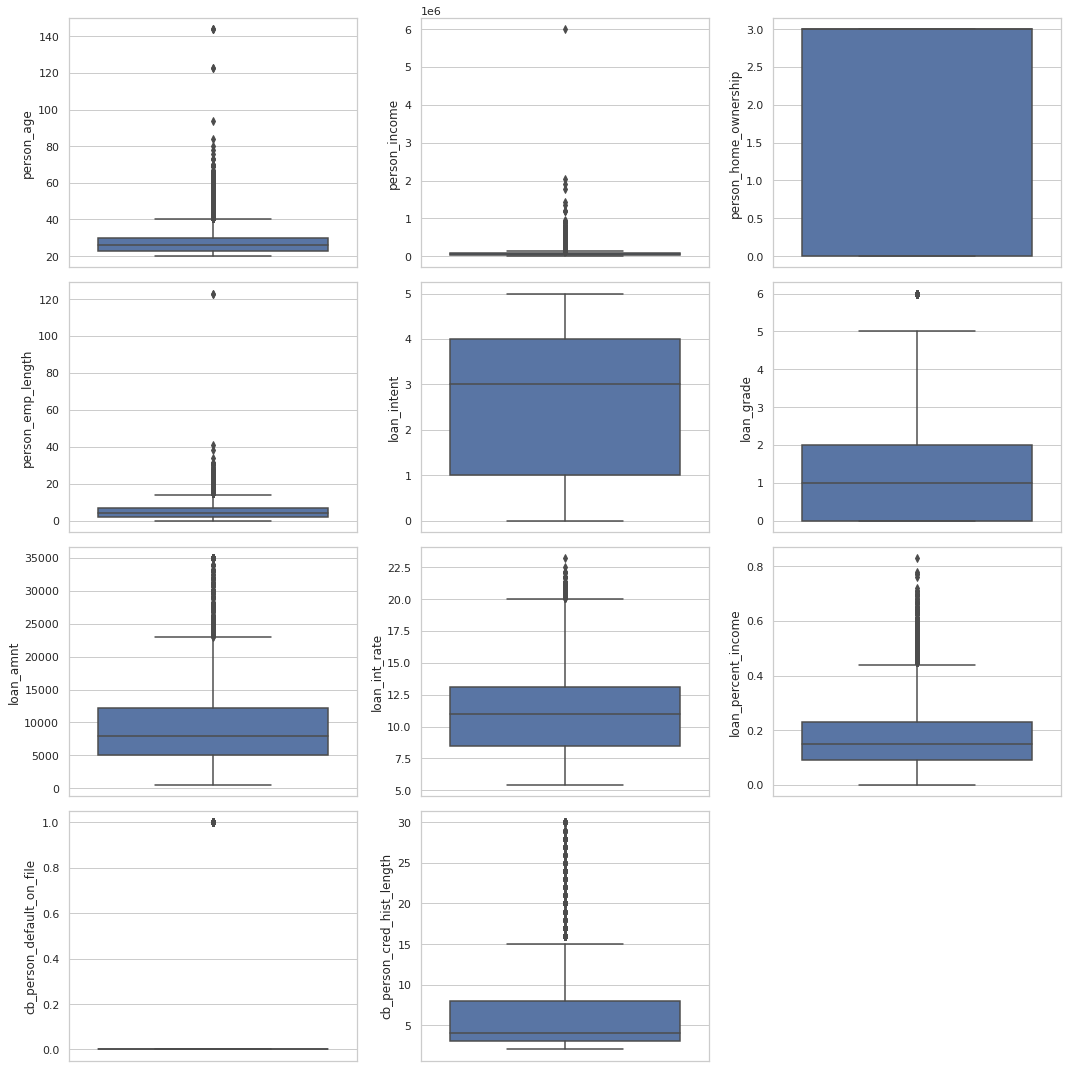

In [ ]:
fig = plt.figure(figsize = (15,15))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(4, 3, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()

**numpy.std()**: Compute the standard deviation along the specified axis.

n_std: số chỉ định để lọc VD: n_std=3

In [ ]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df


In [ ]:
df1=remove_outliers(df,features_numerical.columns,3)
df1

Working on column: person_age
Working on column: person_income
Working on column: person_home_ownership
Working on column: person_emp_length
Working on column: loan_intent
Working on column: loan_grade
Working on column: loan_amnt
Working on column: loan_int_rate
Working on column: loan_percent_income
Working on column: cb_person_default_on_file
Working on column: cb_person_cred_hist_length


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.140000,0,0.10,0,2
5,21,9900,2,2.0,5,0,2500,7.140000,1,0.25,0,2
9,21,10000,2,6.0,5,3,1600,14.740000,1,0.16,0,3
11,21,10000,2,2.0,2,0,4500,8.630000,1,0.45,0,2
19,24,10800,0,8.0,1,1,1750,10.990000,1,0.16,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32287,36,44000,3,4.0,0,3,8000,17.490000,1,0.18,0,15
32289,40,33000,0,2.0,2,1,1000,11.011695,0,0.03,0,15
32290,37,90000,0,11.0,0,0,4000,6.620000,0,0.04,0,15
32292,38,200000,0,0.0,0,0,3000,7.680000,0,0.01,0,12


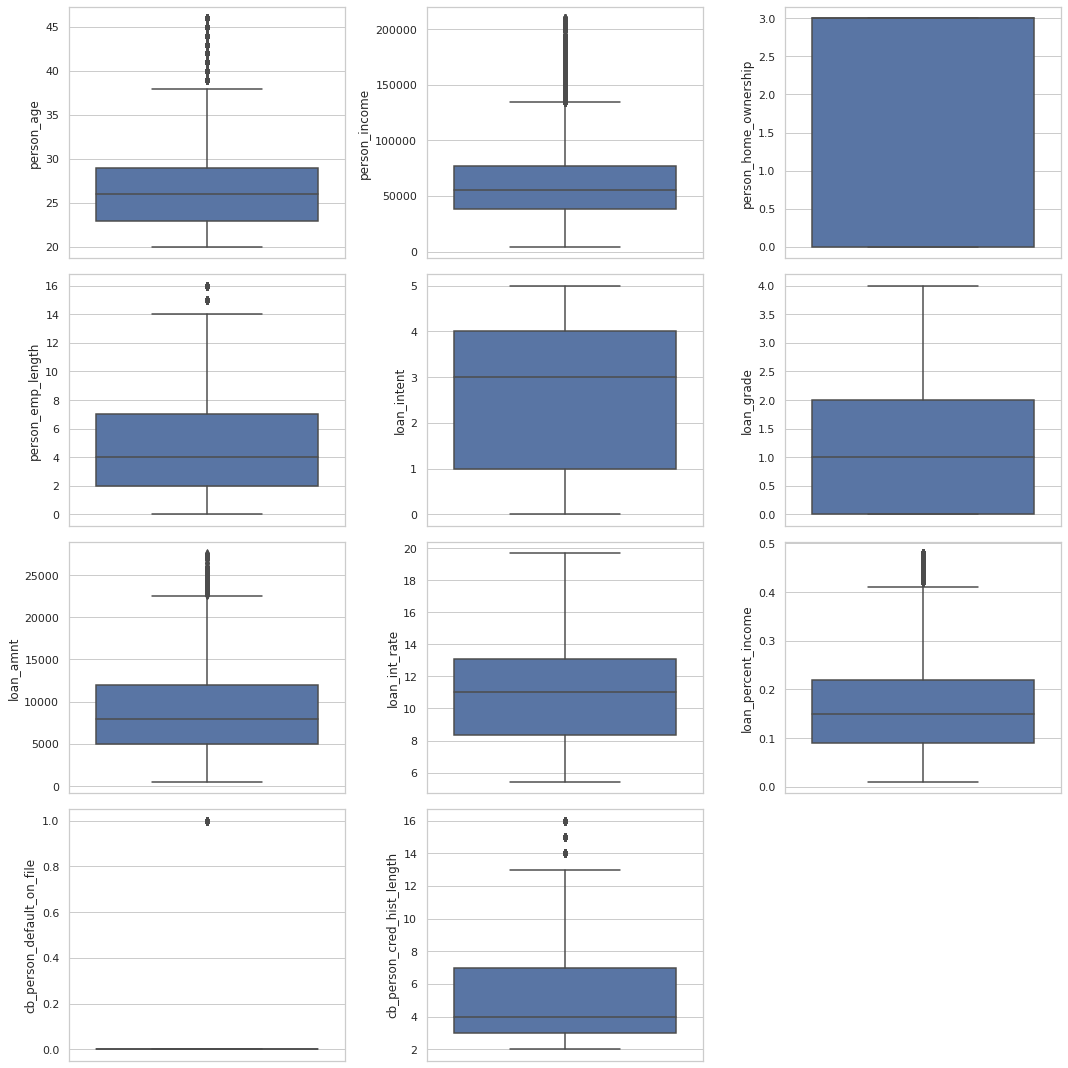

In [ ]:
features_numerical_1 = df1.select_dtypes(exclude = ['object']).drop(['loan_status'], axis = 1).copy()
features_numerical_1.columns
fig = plt.figure(figsize = (15,15))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical_1.columns)):
    fig.add_subplot(4, 3, i+1)
    sns.boxplot(y = features_numerical_1.iloc[:,i].dropna())
plt.tight_layout()

In [ ]:
df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.140000,0,0.10,0,2
5,21,9900,2,2.0,5,0,2500,7.140000,1,0.25,0,2
9,21,10000,2,6.0,5,3,1600,14.740000,1,0.16,0,3
11,21,10000,2,2.0,2,0,4500,8.630000,1,0.45,0,2
19,24,10800,0,8.0,1,1,1750,10.990000,1,0.16,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32287,36,44000,3,4.0,0,3,8000,17.490000,1,0.18,0,15
32289,40,33000,0,2.0,2,1,1000,11.011695,0,0.03,0,15
32290,37,90000,0,11.0,0,0,4000,6.620000,0,0.04,0,15
32292,38,200000,0,0.0,0,0,3000,7.680000,0,0.01,0,12


Lưu Pandas DataFrame dưới dạng tệp CSV

Lưu dataset sau khi đã xử lý vào google drive để tiến hành train và test

In [ ]:
df1.to_csv('/content/drive/My Drive/AI_ML_DS/AI/BTL_AI/credit_risk_dataset_after.csv', index=False)

### Chuẩn hóa dữ liệu

**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# create scaler
scaler = StandardScaler()

In [ ]:
# fit and transform in one step
df2 = scaler.fit_transform(df1)
df_2 = pd.DataFrame(df2,columns=df.columns)
df_2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-1.202552,-1.585564,0.212442,0.125829,-0.880328,-0.155543,-1.431200,0.074488,-0.510781,-0.669594,-0.455365,-0.997407
1,-1.202552,-1.576455,0.212442,-0.718485,1.427970,-1.067580,-1.166049,-1.264813,1.957787,0.859446,-0.455365,-0.997407
2,-1.202552,-1.573419,0.212442,0.407267,1.427970,1.668530,-1.325140,1.279858,1.957787,-0.057978,-0.455365,-0.699803
3,-1.202552,-1.573419,0.212442,-0.718485,-0.303254,-1.067580,-0.812514,-0.765923,1.957787,2.898166,-0.455365,-0.997407
4,-0.599319,-1.549128,-1.185107,0.970144,-0.880328,-0.155543,-1.298625,0.024264,1.957787,-0.057978,-0.455365,-0.997407
...,...,...,...,...,...,...,...,...,...,...,...,...
29993,1.813614,-0.541067,0.911216,-0.155609,-1.457403,1.668530,-0.193827,2.200627,1.957787,0.145894,-0.455365,2.871445
29994,2.617925,-0.875063,-1.185107,-0.718485,-0.303254,-0.155543,-1.431200,0.031528,-0.510781,-1.383146,-0.455365,2.871445
29995,2.014692,0.855644,-1.185107,1.814458,-1.457403,-1.067580,-0.900898,-1.438922,-0.510781,-1.281210,-0.455365,2.871445
29996,2.215769,4.195605,-1.185107,-1.281362,-1.457403,-1.067580,-1.077665,-1.084007,-0.510781,-1.587018,-0.455365,1.978633


In [ ]:
df_2.to_csv('/content/drive/My Drive/AI_ML_DS/AI/BTL_AI/credit_risk_dataset_Standardization.csv', index=False)

**Min max normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# scaler.fit(df)
# df_1=scaler.transform(df)
df3=scaler.fit_transform(df1)

In [ ]:
df_3 = pd.DataFrame(df3,columns=df.columns)
df_3

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.038462,0.026807,0.666667,0.3125,0.2,0.25,0.018450,0.400841,0.0,0.191489,0.0,0.000000
1,0.038462,0.028263,0.666667,0.1250,1.0,0.00,0.073801,0.120533,1.0,0.510638,0.0,0.000000
2,0.038462,0.028749,0.666667,0.3750,1.0,0.75,0.040590,0.653118,1.0,0.319149,0.0,0.071429
3,0.038462,0.028749,0.666667,0.1250,0.4,0.00,0.147601,0.224947,1.0,0.936170,0.0,0.000000
4,0.153846,0.032634,0.000000,0.5000,0.2,0.25,0.046125,0.390329,1.0,0.319149,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
29993,0.615385,0.193862,1.000000,0.2500,0.0,0.75,0.276753,0.845830,1.0,0.361702,0.0,0.928571
29994,0.769231,0.140443,0.000000,0.1250,0.4,0.25,0.018450,0.391850,0.0,0.042553,0.0,0.928571
29995,0.653846,0.417249,0.000000,0.6875,0.0,0.00,0.129151,0.084093,0.0,0.063830,0.0,0.928571
29996,0.692308,0.951437,0.000000,0.0000,0.0,0.00,0.092251,0.158374,0.0,0.000000,0.0,0.714286


In [ ]:
df_3.to_csv('/content/drive/My Drive/AI_ML_DS/AI/BTL_AI/credit_risk_dataset_normalization.csv', index=False)

### **Mô hình sử dụng kĩ thuật SMOTE**

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X = df_3.drop(["loan_status"],axis=1)
y = df_3['loan_status']
X_smote, y_smote = sm.fit_resample(X, y)
X_smote= pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
df_4 = pd.concat([X_smote, y_smote],axis=1)

In [ ]:
df_4

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0.038462,0.026807,0.666667,0.312500,0.200000,0.250000,0.018450,0.400841,0.191489,0.0,0.000000,0.0
1,0.038462,0.028263,0.666667,0.125000,1.000000,0.000000,0.073801,0.120533,0.510638,0.0,0.000000,1.0
2,0.038462,0.028749,0.666667,0.375000,1.000000,0.750000,0.040590,0.653118,0.319149,0.0,0.071429,1.0
3,0.038462,0.028749,0.666667,0.125000,0.400000,0.000000,0.147601,0.224947,0.936170,0.0,0.000000,1.0
4,0.153846,0.032634,0.000000,0.500000,0.200000,0.250000,0.046125,0.390329,0.319149,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47577,0.192308,0.197807,0.706255,0.007423,0.000000,0.970309,0.689515,0.776737,0.891090,1.0,0.125891,1.0
47578,0.077245,0.254022,0.000000,0.375000,0.198324,0.750000,0.292008,0.665278,0.298407,0.0,0.000000,1.0
47579,0.428612,0.221951,1.000000,0.127249,0.607196,0.500000,0.643101,0.566107,0.744681,1.0,0.497430,1.0
47580,0.213917,0.258194,0.000000,0.285116,0.600000,0.750000,0.292921,0.764664,0.295240,1.0,0.000000,1.0


In [ ]:
df_4.to_csv('/content/drive/My Drive/AI_ML_DS/AI/BTL_AI/credit_risk_dataset_SMOTE.csv', index=False)

In [ ]:
features_numerical_smote = df_4.select_dtypes(exclude = ['object'])
features_numerical_smote.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [ ]:
df_4["loan_status"].value_counts()

0.0    23791
1.0    23791
Name: loan_status, dtype: int64

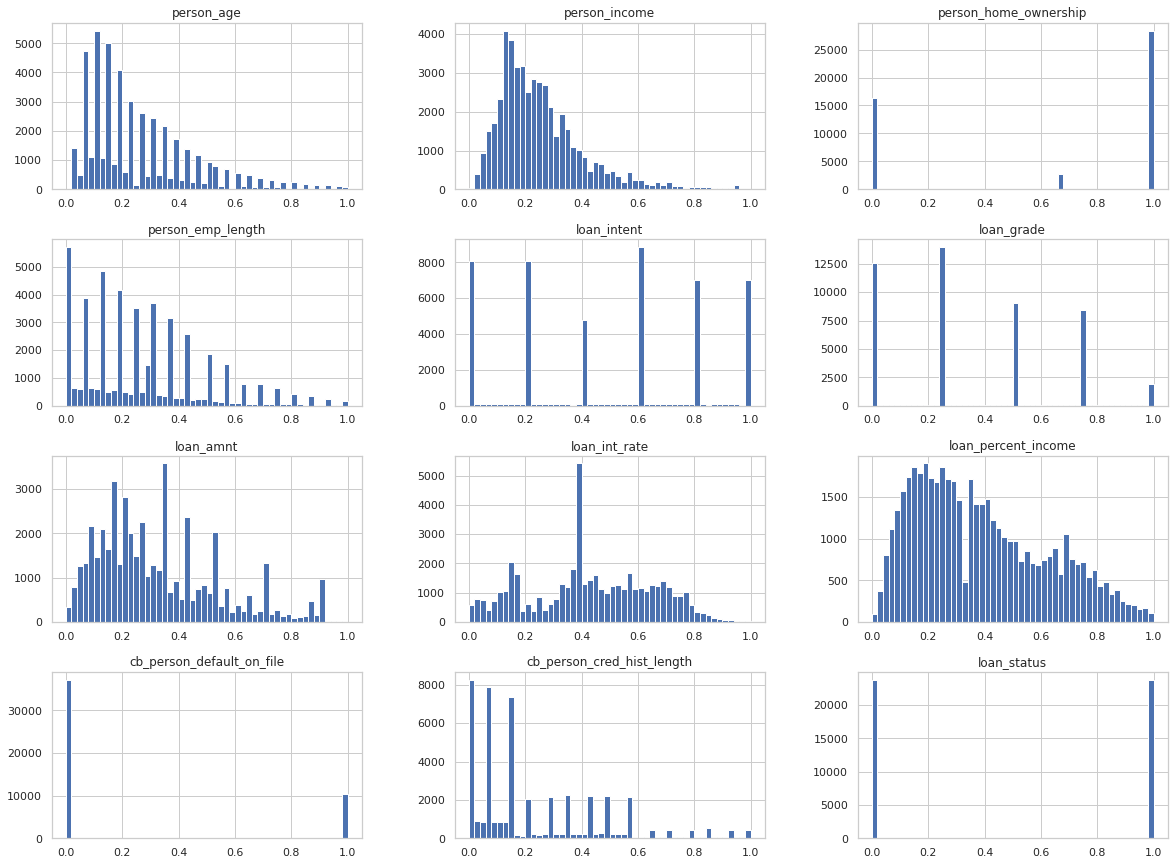

In [ ]:
# Dataset statistics
df_4.describe().T

# Histograms for numerical Data
df_4.hist(bins=50, figsize=(20,15))
plt.show()